## Group No : 186

## Group Member Names:
1. Dinesh Kannan R
2. Krishnan R
3. Suresh M R
4. Yogesh Laxmikantrao Deshpande 

# 1. Import the required libraries

In [309]:
##---------Type the code below this line------------------##
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

print(tf.__version__)

2.13.0-rc1


# 2. Data Acquisition  -- Score: 0.5 Mark
 
For the problem identified by you, students have to find the data source themselves from any data source.

## 2.1 Code for converting the above downloaded data into a form suitable for DL



In [310]:
##---------Type the code below this line------------------##
(ds_train,ds_test), info = tfds.load('horses_or_humans', split=['train','test'], shuffle_files=True, with_info=True, as_supervised=True)
# print(ds_train)
print(info)

tfds.core.DatasetInfo(
    name='horses_or_humans',
    full_name='horses_or_humans/3.0.0',
    description="""
    A large set of images of horses and humans.
    """,
    homepage='http://laurencemoroney.com/horses-or-humans-dataset',
    data_path='/Users/dinesh/tensorflow_datasets/horses_or_humans/3.0.0',
    file_format=tfrecord,
    download_size=153.59 MiB,
    dataset_size=153.53 MiB,
    features=FeaturesDict({
        'image': Image(shape=(300, 300, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=256, num_shards=1>,
        'train': <SplitInfo num_examples=1027, num_shards=2>,
    },
    citation="""@ONLINE {horses_or_humans,
    author = "Laurence Moroney",
    title = "Horses or Humans Dataset",
    month = "feb",
    year = "2019",
    url = "http://laurencemoroney.com/horses-or-humans-dataset"
    }""",
)


## 2.1 Write your observations from the above. 

1. Size of the dataset
2. What type of data attributes are there?
3. What are you classifying?
4. Plot the distribution of the categories of the target / label. 



1. Size of the dataset
	Dataset is already split as ['train', 'test']
	- 'train' dataset size is 1027
	- 'test' dataset size is 256
2. What type of data attributes are there?
	We have 2 attributes ['image', 'label']
	- 'image' is of type Image
	- 'label' is of type ClassLabel
3. What are you classifying?
	To classify the image as either horses or humans. It is clear from the info 'ClassLabel(shape=(), dtype=int64, num_classes=2)' that there are max of 2 classifications and they are ['horses', 'humans']
4. Plot the distribution of the categories of the target/label.


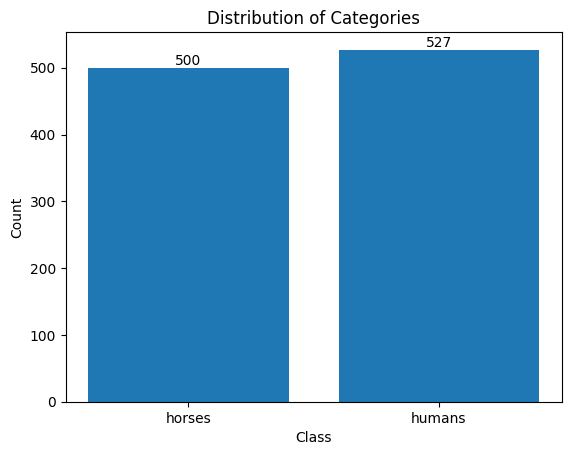

In [311]:
#--------------Type the answers below this line--------------
print("1. Size of the dataset")
datasets = list(info.splits.keys())
print(f"\tDataset is already split as {datasets}")
for dataset in datasets:
    print(f"\t- '{dataset}' dataset size is {info.splits[dataset].num_examples}")

print("2. What type of data attributes are there?")
features= list(info.features.keys())
class_names = info.features['label'].names
print(f"\tWe have {len(features)} attributes {features}")
for feature in features:
    print(f"\t- '{feature}' is of type {info.features[feature].__class__.__name__}")
print("3. What are you classifying?")
print(f"\tTo classify the image as either horses or humans. It is clear from the info '{info.features['label']}' that there are max of 2 classifications and they are {class_names}")
print("4. Plot the distribution of the categories of the target/label.")
# Count the occurrences of each class in the dataset
class_counts=tfds.as_dataframe(ds_train,info).groupby(['label'])['label'].count()
# Plot the distribution
plt.bar(class_names, class_counts)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Categories')
for i, count in enumerate(class_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.show()


# 3. Data Preparation -- Score: 1 Mark

Perform the data prepracessing that is required for the data that you have downloaded. 


This stage depends on the dataset that is used. 

## 3.1 Apply pre-processing techiniques

* to remove duplicate data
* to impute or remove missing data
* to remove data inconsistencies
* Encode categorical data
* Normalize the data
* Feature Engineering
* Stop word removal, lemmatiation, stemming, vectorization


IF ANY

Visualize one image from the dataset and its pixel values


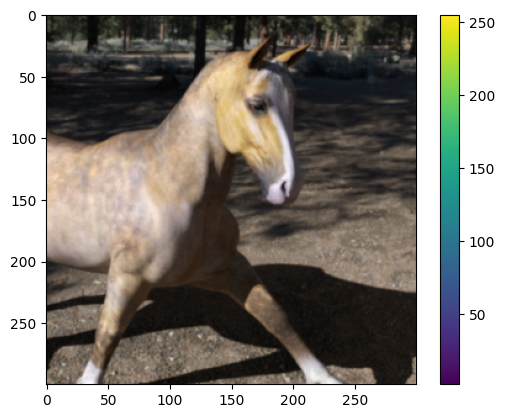

Normalizing the pixel values between 0 to 1...
<class 'tensorflow.python.data.ops.prefetch_op._PrefetchDataset'>
Visaualize one image form the dataset after normalizing


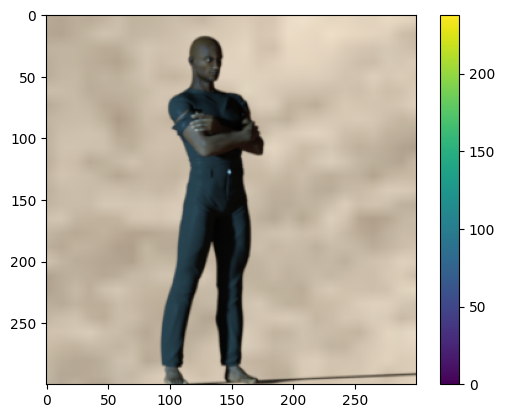

In [312]:
##---------Type the code below this line------------------##
print("Visualize one image from the dataset and its pixel values")
# ds =ds_train.take(1)
for image,label in ds_train.take(1):
  plt.figure()
  plt.imshow(image)
  plt.colorbar()
  plt.grid(False)
  plt.show()
print("Normalizing the pixel values between 0 to 1...")
def normalize_img(image, label):
  """Normalizes images: `uint8` -> `float32`."""
  # return tf.cast(image, tf.float32) / 255., label
  return image, label
print(ds_train.__class__)
ds_train_norm = ds_train.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)

ds_test_norm = ds_test.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
print("Visaualize one image form the dataset after normalizing")
for image,label in ds_train_norm.take(1):
  plt.figure()
  plt.imshow(image)
  plt.colorbar()
  plt.grid(False)
  plt.show()

## 3.2 Identify the target variables.

* Separate the data front the target such that the dataset is in the form of (X,y) or (Features, Label)

* Discretize / Encode the target variable or perform one-hot encoding on the target or any other as and if required.





In [313]:
##---------Type the code below this line------------------##
print("Separating the data from the target...")
def get_features(x,y):
  return x
def get_labels(x,y):
  return y
print("Extracting feature (image) from the dataset..")
x_train = ds_train_norm.map(get_features)
print("Extracting target value (labels) from the dataset")
y_train = ds_train_norm.map(get_labels)
x_test = ds_test_norm.map(get_features)
y_test = ds_test_norm.map(get_labels)
print(f"First 10 target values before encoding...\n{list(y_train.take(10).as_numpy_iterator())}")
print("Performing one-hot encoding on the target varibale(label)")
y_train_encoded = tf.keras.utils.to_categorical(list(y_train.as_numpy_iterator()),info.features['label'].num_classes)
y_test_encoded = tf.keras.utils.to_categorical(list(y_test.as_numpy_iterator()),info.features['label'].num_classes)
print(f"First 10 target values after one-hot encoding...\n{y_train_encoded[:10]}")
print("Preparing the dataset such that it is in the form of (X,y) or (Features, Label)...")
y_train = tf.data.Dataset.from_tensor_slices(y_train_encoded)
y_test = tf.data.Dataset.from_tensor_slices(y_test_encoded)
x_y_train = tf.data.Dataset.zip(x_train,y_train)
x_y_test = tf.data.Dataset.zip(x_test,y_test)
print("Dataset prepared.")

Separating the data from the target...
Extracting feature (image) from the dataset..
Extracting target value (labels) from the dataset
First 10 target values before encoding...
[1, 0, 0, 0, 1, 0, 1, 0, 0, 1]
Performing one-hot encoding on the target varibale(label)
First 10 target values after one-hot encoding...
[[0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]]
Preparing the dataset such that it is in the form of (X,y) or (Features, Label)...
Dataset prepared.


## 3.3 Split the data into training set and testing set

In [314]:
##---------Type the code below this line------------------##
print("Dataset is already split into train and test sets and we have loaded both into separate data sets.")
print(f"Train Set - Total Records: {len(x_y_train)}\n\nTest Set - Total Records: {len(x_y_test)}")

Dataset is already split into train and test sets and we have loaded both into separate data sets.
Train Set - Total Records: 1027

Test Set - Total Records: 256


## 3.4 Preprocessing report

Mention the method adopted  and justify why the method was used
* to remove duplicate data, if present 
* to impute or remove missing data, if present 
* to remove data inconsistencies, if present 
* to encode categorical data 
* the normalization technique used

If the any of the above are not present, then also add in the report below.

Report the size of the training dataset and testing dataset


**----------------------------------------------------------------------------------------------**<br>
**To remove duplicate data, if present** <br>

    - Since we are checking for duplicates in images, and the image is represented as an ndarray which is not hashable, we convert the entire record as string and check for duplicates.
    - Since this operation takes a lot of time, this is not performed in this file.

**To impute or remove missing data, if present**<br>
**To remove data inconsistencies, if present**<br>

    - Data set contains images and all the records were labelled.
    - Since we are dealing with images and the fact that all images are labelled it is less likely that the image is blank or has any other issues.

**To encode categorical data**<br>

    - Categorical data in the given data set was alreay encoded to numerical values and we direcly applied one-hot encoding on them using `to_categorical` method.

**The normalization technique used**<br>

    - Data set contains images whose pixel values are represented in a range from 0 to 255. These pixel values has been normalized to range between 0 and 1.
    - The Deep Learning model will expext the input to be of int,float or string and hence the image type is converted to float.

**Size of the Training and Testing Data set**<br>

    - Given dataset was already split into training and test set with 1027 and 256 records respectively.
    - Total recods in Train set - 1027
    - Total recods in Validation set - 256

# 4. Deep Neural Network Architecture - Score:  Marks


## 4.1 Design the architecture that you will be using

* Sequential Model Building with Activation for each layer.
* Add dense layers, specifying the number of units in each layer and the activation function used in the layer.
* Use Relu Activation function in each hidden layer
* Use Sigmoid / softmax Activation function in the output layer as required

DO NOT USE CNN OR RNN. 

In [315]:
##---------Type the code below this line------------------##
INPUT_SHAPE = info.features['image'].shape
OP_CLASSES=info.features['label'].num_classes

#Create a sequencial model in Keras
model = tf.keras.models.Sequential()
learning_rate = 0.01
L1_regularizer = tf.keras.regularizers.L1(learning_rate)
#Add input layer. Since its a 300x300 input we flatten it.
model.add(keras.layers.Flatten(input_shape=INPUT_SHAPE,
                              name='Input-Layer'))

#Add first hidden layer
model.add(keras.layers.Dense(128,
                              name='Hidden-Layer-1',
                              activation='relu'
                              ))
model.add(keras.layers.Dense(128,
                              name='Hidden-Layer-2',
                              activation='relu'
                              ))
#Add an output layer with softmax activation
model.add(keras.layers.Dense(OP_CLASSES,
                             name='Output-Layer',
                             activation='sigmoid'))
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input-Layer (Flatten)       (None, 270000)            0         
                                                                 
 Hidden-Layer-1 (Dense)      (None, 128)               34560128  
                                                                 
 Hidden-Layer-2 (Dense)      (None, 128)               16512     
                                                                 
 Output-Layer (Dense)        (None, 2)                 258       
                                                                 
Total params: 34576898 (131.90 MB)
Trainable params: 34576898 (131.90 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## 4.2 DNN Report

Report the following and provide justification for the same.



* Number of layers
* Number of units in each layer
* Total number of trainable parameters 



**----------------------------------------------------------------------------------------------**<br>
**Number of layers** <br>

    - Total Layers = 3
    - Input-Layer
    - Hidden-Layer-1
    - Output-Layer
 
**Number of units in each layer**<br>

    - Total units = 130
    - Distributed as 128 units in "Hidden-Layer-1" and 2 units in the "Output-Layer"

**Total number of trainable parameters**<br>

    - Total parameters: 34,560,386
    - Trainable parameters: 34,560,386

# 5. Training the model - Score: 1 Mark


## 5.1 Configure the training

Configure  the model for training, by using appropriate optimizers and regularizations

Compile with categorical CE loss and metric accuracy.

In [316]:
##---------Type the code below this line------------------##
sgd_optimizer = tf.keras.optimizers.legacy.SGD(learning_rate=learning_rate)
cat_CE_loss = tf.keras.losses.CategoricalCrossentropy()
accuracy_metrics = tf.keras.metrics.Accuracy()
model.compile(optimizer=sgd_optimizer,loss=cat_CE_loss,metrics=accuracy_metrics)

## 5.2 Train the model

Train Model with cross validation, with total time taken shown for 20 epochs.

Use SGD.


Training the model......
Epoch 1/20
33/33 [==============================] - 2s 43ms/step - loss: nan - accuracy: 0.1947              
Epoch 2/20
33/33 [==============================] - 1s 42ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 3/20
33/33 [==============================] - 1s 40ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 4/20
33/33 [==============================] - 1s 40ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 5/20
33/33 [==============================] - 1s 40ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 6/20
33/33 [==============================] - 1s 40ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 7/20
33/33 [==============================] - 1s 41ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 8/20
33/33 [==============================] - 1s 40ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 9/20
33/33 [==============================] - 1s 40ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 10/20
33/33 [==============================] - 1s 41ms/ste

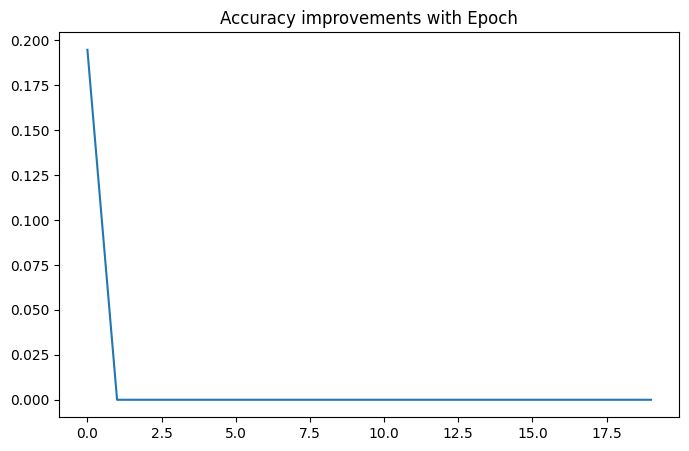

In [317]:
##---------Type the code below this line------------------##
BATCH_SIZE=32
EPOCHS=20
x_y_batched=x_y_train.batch(32)

print("\nTraining the model......")
history=model.fit(x_y_batched,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS)

print("\nAccuracy during Training :\n------------------------------------")

pd.DataFrame(history.history)["accuracy"].plot(figsize=(8, 5))
plt.title("Accuracy improvements with Epoch")
plt.show()

Justify your choice of optimizers and regulizations used and the hyperparameters tuned


In [ ]:
##---------Type the answers below this line------------------##

# 6. Test the model - 0.5 marks


In [ ]:
##---------Type the code below this line------------------##

# 7. Intermediate result  - Score: 1 mark

1. Plot the training and validation accuracy history.
2. Plot the training and validation loss history. 
3. Report the testing accuracy and loss.
4. Show Confusion Matrix for testing dataset.
5. Report values for preformance study metrics like accuracy, precision, recall, F1 Score.


In [ ]:
##---------Type the code below this line------------------##

# 8. Model architecture - Score: 1 mark


Modify the architecture designed in section 4.1 

1. by decreasing one layer
2. by increasing one layer

For example, if the architecture in 4.1 has 5 layers, then 8.1 should have 4 layers and 8.2 should have 6 layers.

Plot the comparison of the training and validation accuracy of the three architecures (4.1, 8.1 and 8.2)



In [ ]:
##---------Type the code below this line------------------##

# 9. Regularisations - Score: 1 mark

Modify the architecture designed in section 4.1

1. Dropout of ratio 0.25
2. Dropout of ratio 0.25 with L2 regulariser with factor 1e−04. 

Plot the comparison of the training and validation accuracy of the three (4.1, 9.1 and 9.2)



In [ ]:
##---------Type the code below this line------------------##

# 10. Optimisers -Score: 1 mark

Modify the code written in section 5.2

1. RMSProp with your choice of hyper parameters
2. Adam with your choice of hyper parameters

Plot the comparison of the training and validation accuracy of the three (5.2, 10.1 and 10.2)


In [ ]:
##---------Type the code below this line------------------##

# 11. Conclusion - Score: 1 mark

Comparing the sections 4.1, 5.2, 8, 9, and 10, present your observations on which model or architecture or regualiser or optimiser perfomed better.


In [ ]:
##---------Type the code below this line------------------##

### NOTE


All Late Submissions will incur a <b>penalty of -2 marks </b>. So submit your assignments on time.

Good Luck

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds

# Load the horses_or_humans dataset
dataset, info = tfds.load('horses_or_humans', split='train', shuffle_files=True, with_info=True,as_supervised=True)
# Prepare the dataset
train_data = dataset.map(lambda x: (x['image'], x['label']))
# for train_data_i in train_data:
#     print(train_data_i)
dataset = dataset.batch(32)
for data in dataset:
    # print(data[0].numpy)
    print(data[1].numpy())

# Define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(300, 300, 3)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
# model.fit(dataset, epochs=2)


In [ ]:
dataset = tf.keras.datasets.fashion_mnist.load_data()